In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [170]:
import pandas as pd
import csv

def read_single_csv(input_path):
    df_chunk = pd.read_csv(input_path,chunksize=1000000,encoding='UTF-8',names=['A','B','C','D','E','F','G','H','I','J',
                                                                                'K','L','M','N','O','P','Q','R','S','T','U','V','W','get_on_long','get_on_lat','get_off_long','get_off_lat'],low_memory=False)
    res_chunk=[]
    for chunk in df_chunk:
        res_chunk.append(chunk)
    res_df=pd.concat(res_chunk)
    print(res_df)
    return res_df

new_data = read_single_csv("Data/operator_his_OPERATE_HIS.csv")

                 A                     B           C          D        E    F  \
0            80001  20170204000033716076  1149836239  200015530  粤AX0V87  724   
1            80002  20170204000033717917  1149836945  200013727  粤AF22D2  417   
2            80003  20170204000033717918  1149836942  200015831  粤AH15J0  960   
3            80004  20170204000033717984  1149836968  200016295  粤A214SX  723   
4            80005  20170204000033716743  1149836487  200013377  粤A0HP52   82   
...            ...                   ...         ...        ...      ...  ...   
11175133  11255134  20170329000044254931  1157306694  200015210  粤AS6T42  965   
11175134  11255135  20170329000044254935  1157306694  200017321  粤AK03G9  985   
11175135  11255136  20170329000044256698  1157307487  200013141  粤AS0N44  961   
11175136  11255137  20170329000044256703  1157307487  200017281  粤AJ74N0  603   
11175137  11255138  20170329000044256705  1157307490  200015127  粤A2BR31  971   

                 G       H 

In [114]:
# new_data = res[res['B'].str.contains('20170205')]
# new_data = res[res['B'].str.contains('20170202')]

基于下车地点聚类

In [171]:
area_0 = pd.DataFrame(new_data,columns=['get_off_long','get_off_lat'])
# 去除异常值
area_0 = area_0.drop(area_0[area_0.get_off_long < 0.01].index)
area_0 = area_0.drop(area_0[area_0.get_off_long < 0.01].index)
print(len(area_0))

11105608


得到关于聚类后的点数

In [172]:
area_1 = pd.DataFrame(new_data,columns=['W','get_off_long','get_off_lat'])
# 去除异常值

area_1 = area_1.drop(area_1[area_1.get_off_long < 0.01].index)
area_1 = area_1.drop(area_1[area_1.get_off_long < 0.01].index)

print(area_1)

                            W  get_off_long  get_off_lat
0         2017-02-04 17:47:29    113.249007    23.128932
1         2017-02-04 17:58:21    113.379155    22.937975
2         2017-02-04 17:58:21    113.298335    23.141271
3         2017-02-04 17:58:46    113.305260    23.098317
4         2017-02-04 17:51:12    113.247702    23.116870
...                       ...           ...          ...
11175133  2017-03-29 17:37:16    113.264904    23.130300
11175134  2017-03-29 17:37:17    113.421153    23.161513
11175135  2017-03-29 17:49:36    113.314848    23.153936
11175136  2017-03-29 17:49:38    113.277895    23.149458
11175137  2017-03-29 17:49:39    113.335234    23.177647

[11105608 rows x 3 columns]


In [173]:
area_arr = area_0.values

### KMeans聚类   
--- 算法通过把样本分离成 n 个具有相同方差的类的方式来聚集数据  


简而言之，该算法可分为三个步骤。第一步是选择初始质心，最基本的方法是从 X 数据集中选择 k 个样本。初始化完成后，K-means 由接下来两个步骤之间的循环组成。 第一步将每个样本分配到其最近的质心。第二步通过取分配给每个先前质心的所有样本的平均值来创建新的质心。计算旧的和新的质心之间的差异，并且算法重复这些最后的两个步骤，直到该值小于阈值。换句话说，算法重复这个步骤，直到质心不再显著移动。  
我们只知道当惯量的值较低是较好的，并且零是最优的。但是在非常高维的空间中，欧氏距离往往会膨胀（这就是所谓的 “维度诅咒/维度惩罚”(curse of dimensionality)）。在 k-means 聚类算法之前运行诸如 PCA 之类的降维算法可以减轻这个问题并加快计算速度。  


3.7717041969299316


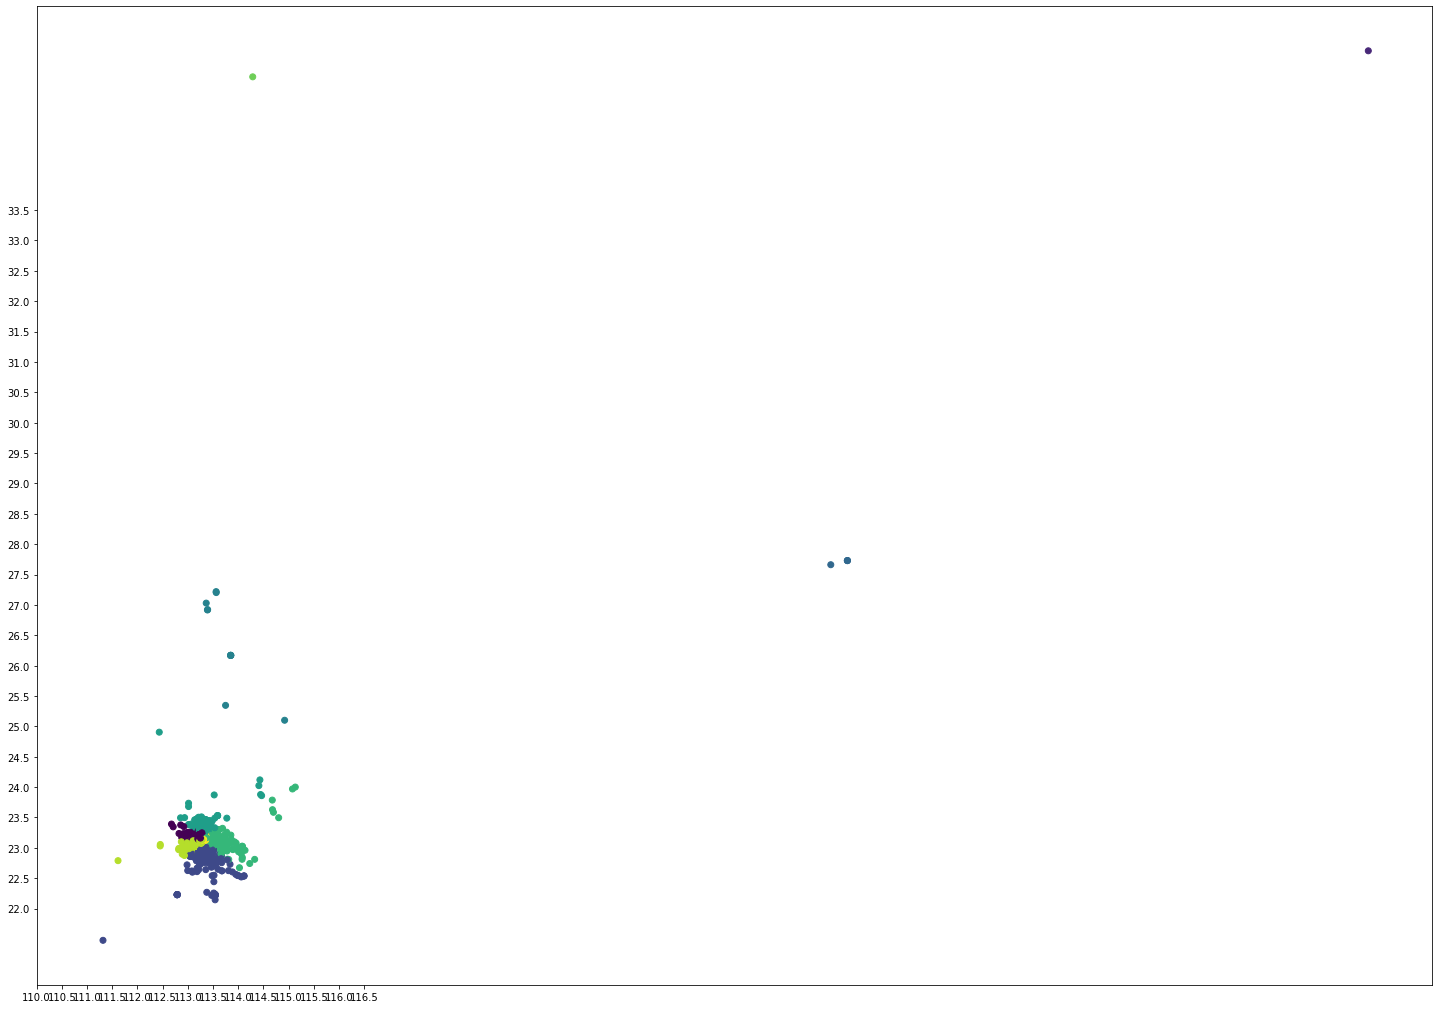

In [142]:
from sklearn.cluster import KMeans
t0 = time.time()
y_pred = KMeans(n_clusters=10).fit_predict(area_arr)
t_batch = time.time() - t0
print(t_batch)

plt.figure(figsize=(25, 18))
plt.scatter(area_arr[:, 0], area_arr[:, 1], c=y_pred)
my_x_ticks = np.arange(110,117, 0.5)
my_y_ticks = np.arange(22,34, 0.5)
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.show()

y_pred

In [119]:
print(len(y_pred))

159694


In [120]:
print(y_pred.shape[0])

159694


In [121]:
# y_pred = y_pred[:-2274]
# print(len(y_pred[:-2274]))
# y_pred = y_pred[:-1888]
# print(len(y_pred[:-1888]))

In [122]:
print(type(area_1))

<class 'pandas.core.frame.DataFrame'>


In [123]:
area_1.insert(area_1.shape[1], 'Area', y_pred)

In [124]:
area_1

,W,get_off_long,get_off_lat,Area
524660,2017-02-05 17:22:55,113.332999,23.136885,4
524661,2017-02-05 17:22:57,113.243573,23.125180,2
524662,2017-02-05 16:37:51,113.314783,23.089372,4
524663,2017-02-05 14:45:58,113.295571,23.219007,9
524664,2017-02-05 14:41:08,113.280804,23.124599,2
...,...,...,...,...
1166122,2017-02-05 14:34:43,113.291007,23.133512,4
1166123,2017-02-05 14:34:45,113.316371,23.137495,4
1166124,2017-02-05 14:34:45,113.290214,23.128488,4
1166125,2017-02-05 16:44:45,113.281989,23.133589,2


进行坐标转换

In [174]:
import math

In [175]:
x_pi = 3.14159265358979324 * 3000.0 / 180.0
pi = 3.1415926535897932384626  # π
a = 6378245.0  # 长半轴
ee = 0.00669342162296594323  # 偏心率平方

In [176]:
def out_of_china(lng, lat):
    """
    判断是否在国内，不在国内不做偏移
    :param lng:
    :param lat:
    :return:
    """
    return not (lng > 73.66 and lng < 135.05 and lat > 3.86 and lat < 53.55)

In [177]:
def _transformlat(lng, lat):
    ret = -100.0 + 2.0 * lng + 3.0 * lat + 0.2 * lat * lat + \
          0.1 * lng * lat + 0.2 * math.sqrt(math.fabs(lng))
    ret += (20.0 * math.sin(6.0 * lng * pi) + 20.0 *
            math.sin(2.0 * lng * pi)) * 2.0 / 3.0
    ret += (20.0 * math.sin(lat * pi) + 40.0 *
            math.sin(lat / 3.0 * pi)) * 2.0 / 3.0
    ret += (160.0 * math.sin(lat / 12.0 * pi) + 320 *
            math.sin(lat * pi / 30.0)) * 2.0 / 3.0
    return ret

In [178]:
def _transformlng(lng, lat):
    ret = 300.0 + lng + 2.0 * lat + 0.1 * lng * lng + \
          0.1 * lng * lat + 0.1 * math.sqrt(math.fabs(lng))
    ret += (20.0 * math.sin(6.0 * lng * pi) + 20.0 *
            math.sin(2.0 * lng * pi)) * 2.0 / 3.0
    ret += (20.0 * math.sin(lng * pi) + 40.0 *
            math.sin(lng / 3.0 * pi)) * 2.0 / 3.0
    ret += (150.0 * math.sin(lng / 12.0 * pi) + 300.0 *
            math.sin(lng / 30.0 * pi)) * 2.0 / 3.0
    return ret

In [179]:
def wgs84_to_gcj02(lng, lat):
    """
    WGS84转GCJ02(火星坐标系)
    :param lng:WGS84坐标系的经度
    :param lat:WGS84坐标系的纬度
    :return:
    """
    if out_of_china(lng, lat):  # 判断是否在国内
        return [lng, lat]
    dlat = _transformlat(lng - 105.0, lat - 35.0)
    dlng = _transformlng(lng - 105.0, lat - 35.0)
    radlat = lat / 180.0 * pi
    magic = math.sin(radlat)
    magic = 1 - ee * magic * magic
    sqrtmagic = math.sqrt(magic)
    dlat = (dlat * 180.0) / ((a * (1 - ee)) / (magic * sqrtmagic) * pi)
    dlng = (dlng * 180.0) / (a / sqrtmagic * math.cos(radlat) * pi)
    mglat = lat + dlat
    mglng = lng + dlng
    return mglng, mglat

In [180]:
for index, row in area_1.iterrows():
    row['get_off_long'],row['get_off_lat'] = wgs84_to_gcj02(row['get_off_long'],row['get_off_lat'])
area_1

,W,get_off_long,get_off_lat
0,2017-02-04 17:47:29,113.249007,23.128932
1,2017-02-04 17:58:21,113.379155,22.937975
2,2017-02-04 17:58:21,113.298335,23.141271
3,2017-02-04 17:58:46,113.305260,23.098317
4,2017-02-04 17:51:12,113.247702,23.116870
...,...,...,...
11175133,2017-03-29 17:37:16,113.264904,23.130300
11175134,2017-03-29 17:37:17,113.421153,23.161513
11175135,2017-03-29 17:49:36,113.314848,23.153936
11175136,2017-03-29 17:49:38,113.277895,23.149458


In [181]:
area_1.to_csv("flow_data_weekend.csv")

### MiniBatchKMeans

是 KMeans 算法的一个变种，它使用小批量(mini-batches)来减少计算时间，而这多个批次仍然尝试优化相同的目标函数。小批量是输入数据的子集，在每次训练迭代中随机抽样。这些小批量大大减少了收敛到局部解所需的计算量。 与其他降低 k-means 收敛时间的算法不同，小批量 k-means 产生的结果通常只比标准算法略差。   


In [144]:
import time
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans

mbk = MiniBatchKMeans(init='k-means++', n_clusters=10,
                     max_no_improvement=10, verbose=0)

C:\Users\HUAWEI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


0.19199895858764648


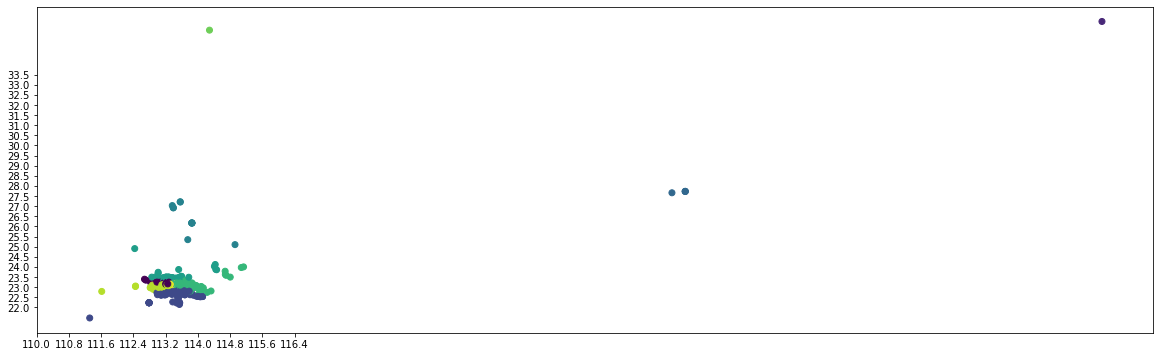

In [169]:
t0 = time.time()
mbk.fit_predict(area_arr)
t_batch = time.time() - t0
print(t_batch)
plt.figure(figsize=(20,6))
plt.scatter(area_arr[:, 0], area_arr[:, 1], c=y_pred)
my_x_ticks = np.arange(110,117,0.8)
my_y_ticks = np.arange(22,34, 0.5)
plt.xticks(my_x_ticks)
plt.yticks(my_y_ticks)
plt.show()

### Birch

The Birch 为给定数据构建一棵 Characteristic Feature Tree (CFT，聚类特征树)。 数据实质上是被有损压缩成一组 Characteristic Feature nodes (CF Nodes，聚类特征节点)。 CF Nodes 有许多称为 Characteristic Feature subclusters (CF Subclusters) 的子簇，并且这些位于非终结位置的CF Subclusters 可以拥有 CF Nodes 作为子节点.

一个新的样本作为一个CF Node 被插入到 CF Tree 的根节点。然后将其合并到根节点的子簇中去，使得合并后子簇拥有最小的半径，子簇的选取受阈值和分支因子的约束。如果子簇也拥有孩子节点，则重复执行这个步骤直到到达叶子结点。在叶子结点中找到最近的子簇以后，递归的更新这个子簇及其父簇的属性。

如果合并了新样本和最近的子簇获得的子簇半径大于阈值的平方(square of the threshold)， 并且子簇的数量大于分支因子，则将为这个样本分配一个临时空间。 最远的两个子簇被选取，剩下的子簇按照之间的距离分为两组作为被选取的两个子簇的孩子节点。

如果拆分的节点有一个父级子簇(parent subcluster)，并且有足够容纳一个新的子簇的空间，那么父簇拆分成两个。如果没有空间容纳一个新的簇，那么这个节点将被再次拆分，依次向上检查父节点是否需要分裂，如果需要, 则按叶子节点方式相同分裂。

Birch 在高维数据上表现不好。按经验来说，如果 n_features 大于20，通常使用 MiniBatchKMeans 更好。
如果需要减少数据实例的数量，或者如果需要大量的子聚类作为预处理步骤或者其他， Birch 比 MiniBatchKMeans 更有用。

C:\Users\HUAWEI\anaconda3\lib\site-packages\sklearn\cluster\_birch.py:647: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (10). Decrease the threshold.
  warnings.warn(


2.329110860824585


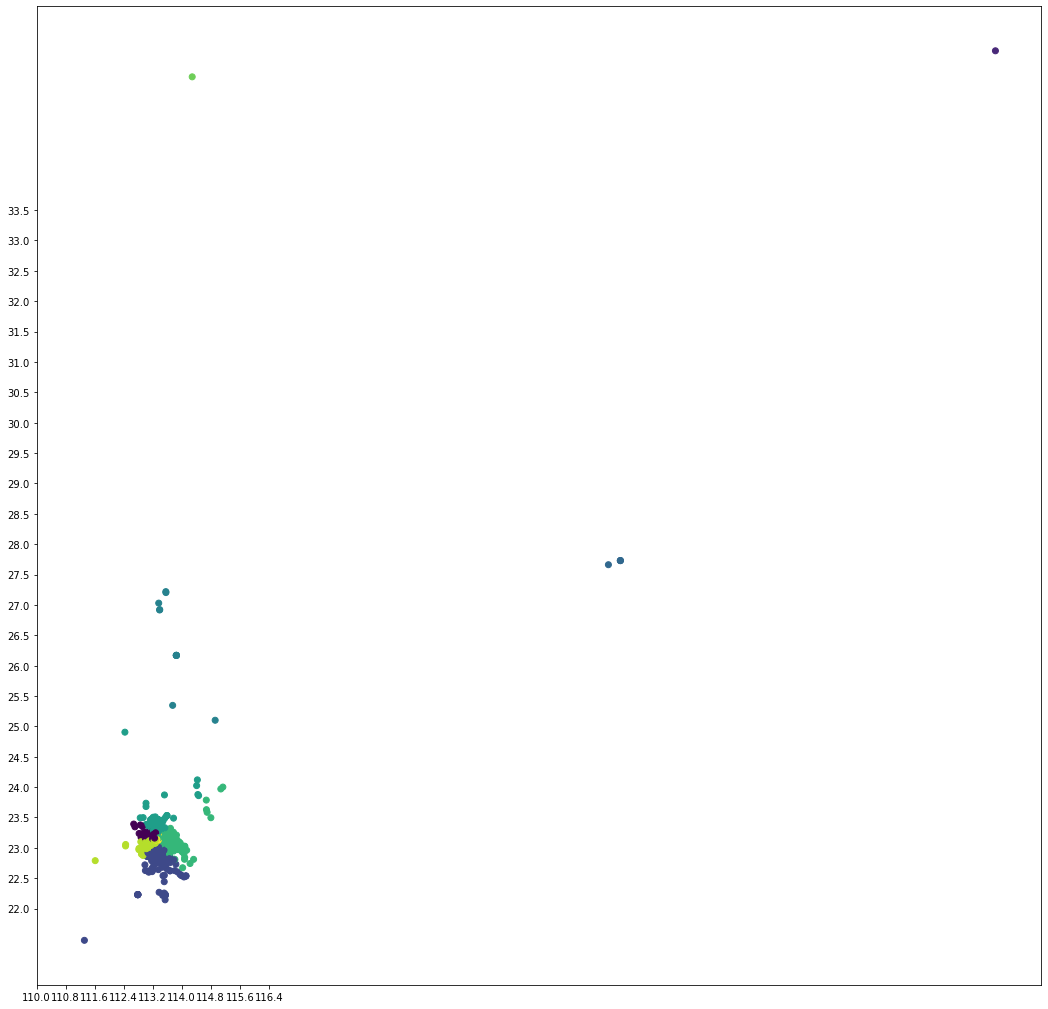

In [161]:
from sklearn.cluster import Birch
brc = Birch(n_clusters=10)

t0 = time.time()
y_pred = brc.fit_predict(area_arr)
t_batch = time.time() - t0
print(t_batch)
# plt.figure(figsize=(18,18))
# plt.scatter(area_arr[:, 0], area_arr[:, 1], c=y_pred)
# my_x_ticks = np.arange(110,117, 0.8)
# my_y_ticks = np.arange(22,34, 0.5)
# plt.xticks(my_x_ticks)
# plt.yticks(my_y_ticks)
# plt.show()